## Question 1

In [33]:
import math
import numpy as np
import matplotlib.pyplot as plt

In [34]:
## reading information from file 1a.txt

data_file = open('1a.txt', 'r')
tuples = data_file.readlines()
 
# obtaining information from the train data in the text file 1a.txt
x_train = []
y_train = []
for single_tuple in tuples:
    a = single_tuple.split(',')
    x_train += [float(a[0].split('(')[2].split(')')[0])]
    y_train += [float(a[1].split(')')[0])]
    
 ## Reading data from the file 1b.txt   
file1 = open('1b.txt', 'r')
Lines = file1.readlines()
 
# extracting data from the text file 1b.txt which is test data
x_test = []
y_test = []
for line in Lines:
    a = line.split(',')
    x_test += [float(a[0].split('(')[2].split(')')[0])]
    y_test += [float(a[1].split(')')[0])]



In [35]:
k=9 ######frequency increment given in data generation
###creating a function for  data point from input x [1,x,sinx,cox,sin2x,....]
def get_data_tuple(x,d):
    x_vec = [1,x]
    for i in range(d): 
        x_vec += [((np.sin(i*k*x))**(i*k))*np.cos(x)]
        x_vec += [((np.cos(i*k*x))**(i*k))*np.sin(x)]   
    return x_vec

##calculate the gradient values in vector form depending on the model type
def get_gradient(y,x,w):
    return np.matmul(x.T,(y - np.matmul(x,w)))


##function for finding grads then update weights, lr=learning_rate, iters= number of iterations of descent
def train(x_in,y_in,lr,iters):
    x = np.array(x_in)      #coverting the X value into an array 
    y = np.array(y_in)      #coverting the y value into an array
    
    w = np.zeros((x.shape[1],1))  ##weight intitaion
    ini_error = float('inf')
    y = y.reshape(-1,1)
    for i in range(iters):
        w_d = get_gradient(y,x,w)  ##gradient value
        cur_error = y - np.matmul(x,w+lr*w_d)
        cur_error = np.mean(np.square(cur_error))
        if(cur_error>ini_error):
            break
        w= w+lr*w_d    ##gradient value update
    return w

Text(0.5, 1.0, 'mse vs D val')

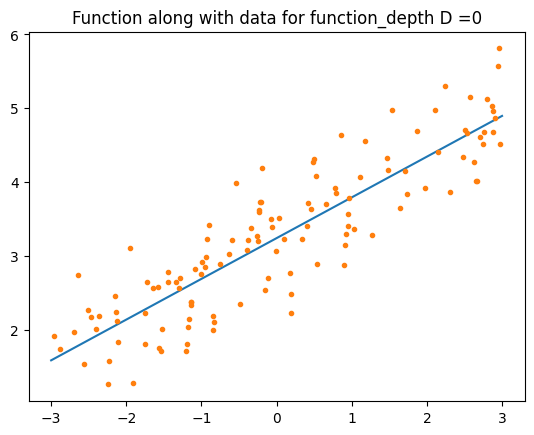

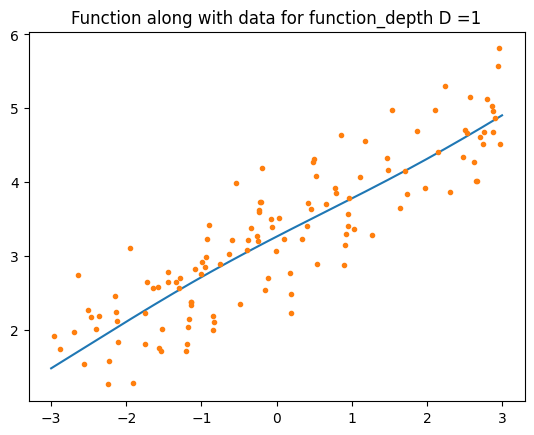

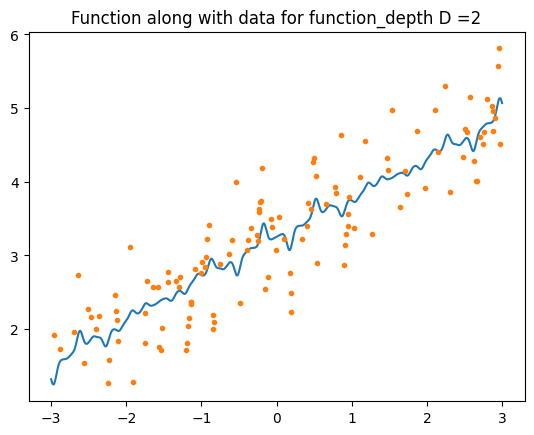

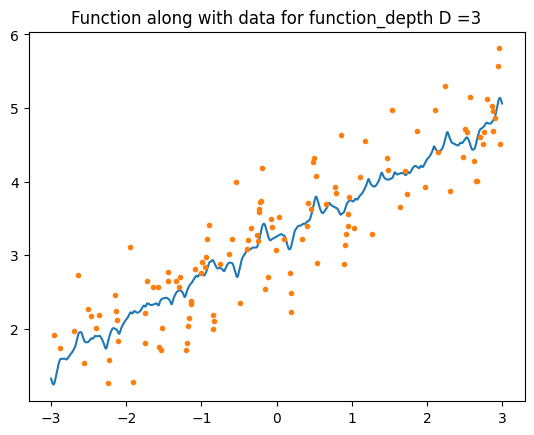

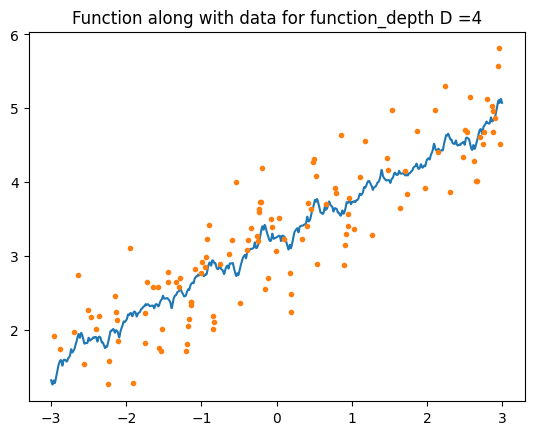

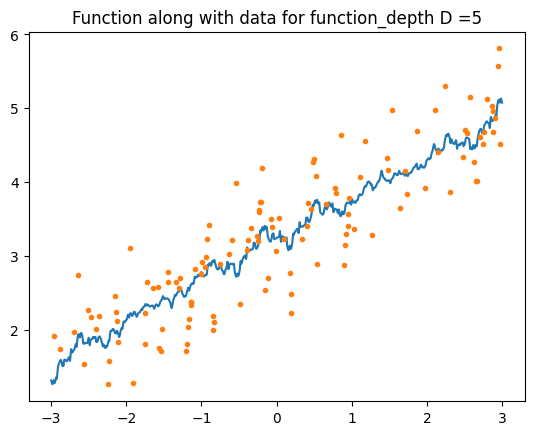

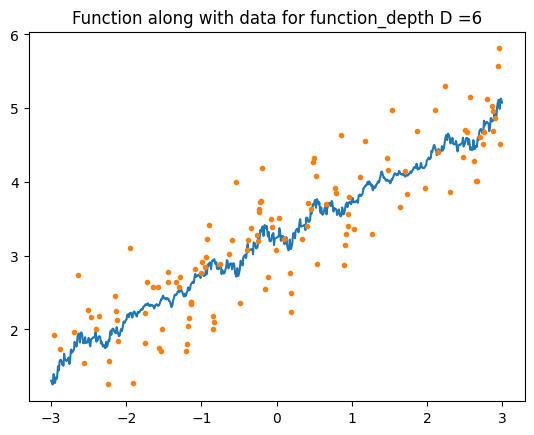

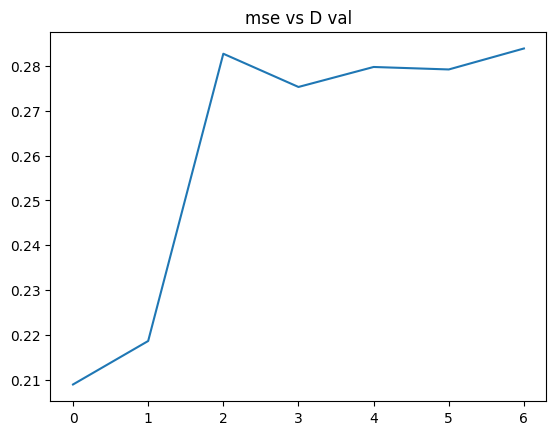

In [36]:
####1a,b,c) 

mse_list = []   #making an empty list of mse
D_range = range(0,7)
#creating a loop for function depth 0 to 6
for D in D_range:
    x_train_vec = []
    x_test_vec = []
    ###creating list of input data points using get_data_tuple function
    for x in x_train:
        x_train_vec+= [get_data_tuple(x,D)]
    for x in x_test:
        x_test_vec+= [get_data_tuple(x,D)]

    ###model

    weights = train(x_train_vec,y_train,0.00005,1000)

    x_pred = []
    x_pred_val = []
    
    ###1b) plotting the function
    n = 1000
    for i in range(-3*n,3*n):
        x_pred_val += [i/n]
    for i in x_pred_val:
        x_pred += [get_data_tuple(i,D)]
    x_pred = np.array(x_pred)
    y_pred = np.matmul(x_pred,weights)

    ##plotting data and model
    plt.figure()
    plt.plot(x_pred_val,y_pred)
    plt.title("Function along with data for function_depth D ="+str(D))
    plt.plot(x_train,y_train,'.')

    ##1c) mean squre error calculation
    
    y_pred = np.matmul(x_test_vec,weights)
    y_test = np.array(y_test).reshape(-1,1)
    
    mse = y_pred-y_test    #difference of the predicted and tested value gives the mean square error
    mse = np.mean(np.square(mse)) 
    mse_list += [mse]


plt.figure()
plt.plot(list(D_range),mse_list)
plt.title("mse vs D val")
